Skipped invalid image: ../Dataset/ب/3.ب.DS_Store
Skipped invalid image: ../Dataset/غ/4.غ.DS_Store
Skipped invalid image: ../Dataset/ٹ/11.ٹ.DS_Store
Skipped invalid image: ../Dataset/ص/5.ص.DS_Store
Skipped invalid image: ../Dataset/ط/5.ط.DS_Store
Skipped invalid image: ../Dataset/ع/8.ع.DS_Store
Skipped invalid image: ../Dataset/ث/5.ث.DS_Store
Skipped invalid image: ../Dataset/ے/5.ے.DS_Store
Skipped invalid image: ../Dataset/ظ/4.ظ.DS_Store
Skipped invalid image: ../Dataset/ض/4.ض.DS_Store


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters: {'C': 100, 'gamma': 0.001}
Test Accuracy: 0.5050505050505051

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.00      0.00      0.00         2
           3       0.67      0.67      0.67         3
           4       0.75      0.75      0.75         4
           5       0.33      0.33      0.33         3
           6       0.40      1.00      0.57         2
           7       0.00      0.00      0.00         2
           8       0.50      1.00      0.67         2
           9       0.25      0.25      0.25         4
          10       1.00      0.67      0.80         3
          12       0.50      0.50      0.50         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       1.00      1.00      1.00         2
          16       0.33      1.00      0.50         1
          17       0.00      0.0

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

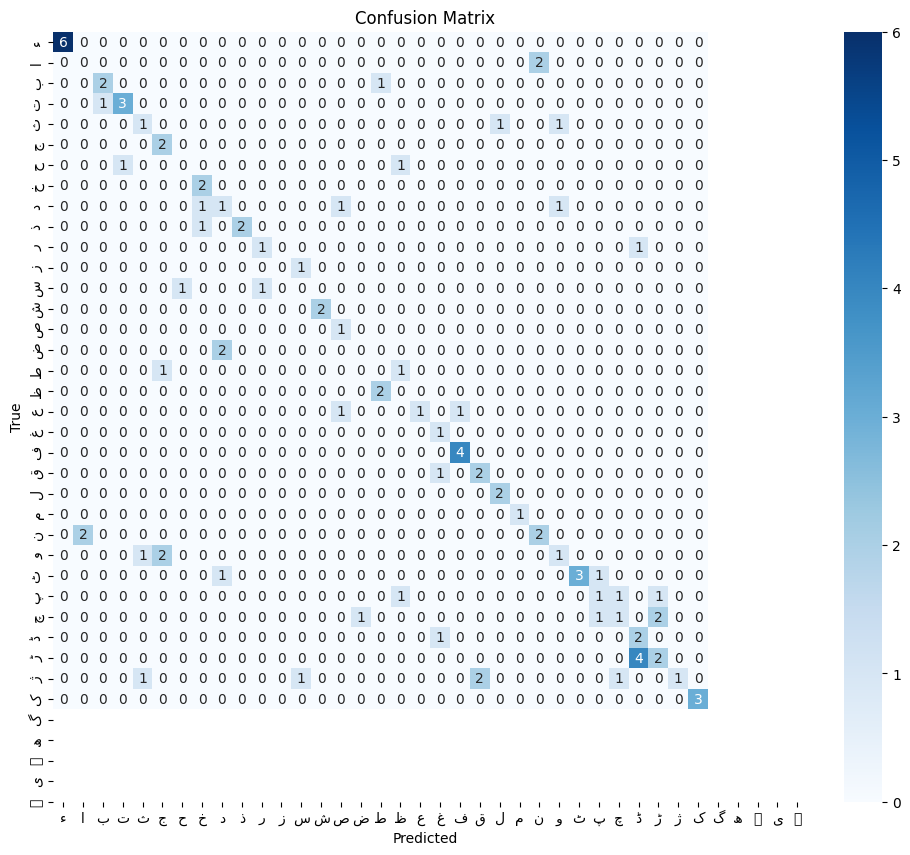

In [5]:
# Urdu Handwritten Letter Recognition using HOG + SVM
# Dataset folder name: 'Dataset'

# ------------------- 1️⃣ Setup -------------------
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

base_path = "../Dataset"  # Dataset folder

# ------------------- 2️⃣ Load & Preprocess -------------------
data = []
labels = []

for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if not os.path.isdir(folder_path):
        continue
    for img_name in os.listdir(folder_path):
        if img_name.startswith('.'):  # skip hidden files
            continue
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print("Skipped invalid image:", img_path)
            continue
        img = cv2.resize(img, (128, 128))
        _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        features, _ = hog(img, orientations=9, pixels_per_cell=(16,16),
                          cells_per_block=(2,2), block_norm='L2-Hys', visualize=True)
        data.append(features)
        labels.append(folder)

data = np.array(data)
labels = np.array(labels)

# ------------------- 3️⃣ Encode Labels -------------------
encoder = LabelEncoder()
labels_enc = encoder.fit_transform(labels)

# ------------------- 4️⃣ Train-Test Split -------------------
X_train, X_test, y_train, y_test = train_test_split(data, labels_enc, test_size=0.1, random_state=42)

# ------------------- 5️⃣ Feature Scaling -------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ------------------- 6️⃣ SVM + Hyperparameter Tuning -------------------
param_grid = {
    'C': [1, 10, 100],
    'gamma': ['scale', 0.01, 0.001]
}
grid = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
model = grid.best_estimator_

# ------------------- 7️⃣ Evaluation -------------------
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ------------------- 8️⃣ Predict Single Image -------------------
def predict_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Invalid image path")
        return
    img = cv2.resize(img, (128, 128))
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    features, _ = hog(img, orientations=9, pixels_per_cell=(16,16),
                      cells_per_block=(2,2), block_norm='L2-Hys', visualize=True)
    features = scaler.transform([features])
    pred = model.predict(features)
    label = encoder.inverse_transform(pred)
    print("Predicted Letter:", label[0])

# Example Usage:
# predict_image('Dataset/ا/img1.jpg')

In [ ]:
import cv2
import os
import numpy as np

# Paths
original_path = "../Dataset"           # Original dataset
augmented_path = "../Augmented_Dataset"  # Folder to save augmented images

if not os.path.exists(augmented_path):
    os.makedirs(augmented_path)

# Augmentation function
def augment_image(img):
    augmented = []
    rows, cols = img.shape
    
    # Rotate ±10 degrees
    for angle in [-10, -5, 5, 10]:
        M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
        dst = cv2.warpAffine(img, M, (cols, rows), borderMode=cv2.BORDER_CONSTANT, borderValue=0)
        augmented.append(dst)
    
    # Shift
    for dx, dy in [(-5,0), (5,0), (0,-5), (0,5)]:
        M = np.float32([[1,0,dx],[0,1,dy]])
        dst = cv2.warpAffine(img, M, (cols, rows), borderMode=cv2.BORDER_CONSTANT, borderValue=0)
        augmented.append(dst)
    
    # Take only 5 images randomly
    if len(augmented) > 5:
        augmented = augmented[:5]
    
    return augmented

# Loop through original dataset
for folder in os.listdir(original_path):
    folder_path = os.path.join(original_path, folder)
    if not os.path.isdir(folder_path):
        continue
    
    save_folder = os.path.join(augmented_path, folder)
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    
    for img_name in os.listdir(folder_path):
        if img_name.startswith('.'):
            continue
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print("Skipped invalid image:", img_path)
            continue
        img = cv2.resize(img, (128, 128))
        _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        
        augmented_images = augment_image(img)
        
        for i, aug_img in enumerate(augmented_images):
            base_name = os.path.splitext(img_name)[0]
            save_name = f"{base_name}_aug{i+1}.jpg"
            cv2.imwrite(os.path.join(save_folder, save_name), aug_img)

print("Augmentation complete! Augmented images stored in:", augmented_path)
